Import required Libraries

In [ ]:
import matplotlib.pyplot as plt

Importing matplotlib to plot the graph of readings taken from Accelerationerometer

In [ ]:

datafile = open('sampledata.txt', 'r')
Lines = datafile.readlines() 
Time = [0]

for line in Lines:
    Time.append(float(line.strip()))



Classifing data and storing the values of different axis in x,y and z list according to te time stamp

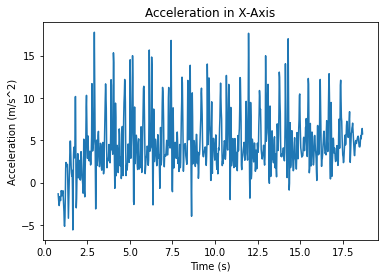

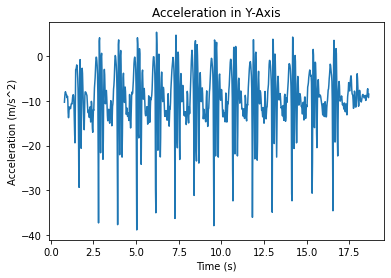

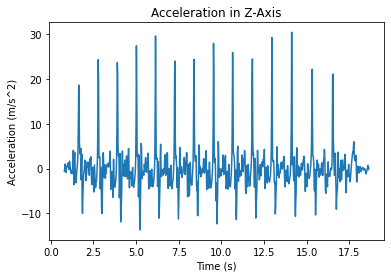

In [ ]:

Acceleration = [] 
Axis_x = []  
Axis_y = []
Axis_z = [] 

datafile = open('Acceleration data.txt', 'r')
Lines = datafile.readlines() 
for line in Lines:
    Acceleration.append(line.strip())


Accelerationeration = [] 
for i in Acceleration:
    i = i.split(" ")
    i.remove("")
    Accelerationeration.append(i)


for i in Accelerationeration:
    while "" in i:
		    i.remove("")


for i in Accelerationeration:
	  Axis_x.append(float(i[0]))
	  Axis_y.append(float(i[1]))
	  Axis_z.append(float(i[2]))

Axis_x = Axis_x[40 : len(Axis_x) - 100]
Axis_y = Axis_y[40 : len(Axis_y) - 100]
Axis_z = Axis_z[40 : len(Axis_z) - 100]
Time = Time[40 : len(Time) - 100]

plt.title("Accelerationeration in X-Axis")
plt.xlabel("Time (s)")
plt.ylabel("Accelerationeration (m/s^2)")
plt.plot(Time, Axis_x)
plt.show()

plt.title("Accelerationeration in Y-Axis")
plt.xlabel("Time (s)")
plt.ylabel("Accelerationeration (m/s^2)")
plt.plot(Time, Axis_y)
plt.show()

plt.title("Accelerationeration in Z-Axis")
plt.xlabel("Time (s)")
plt.ylabel("Accelerationeration (m/s^2)")
plt.plot(Time, Axis_z)
plt.show()

There are some peaks which are small so the detection will not be able to work very well . So now we will apply a average smoothing filter on graph to detect perfect peaks.

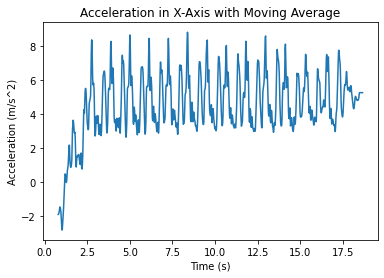

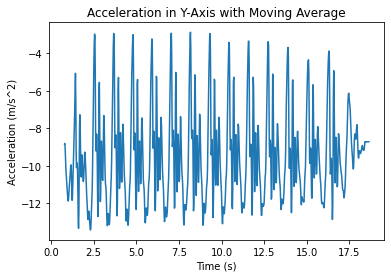

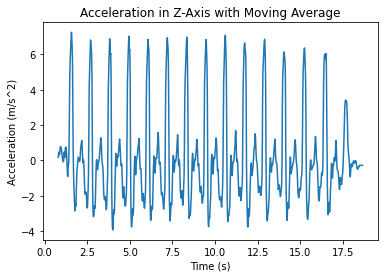

In [ ]:

AvgX = []
neighbour_size = 10
i = 0
while i < len(Axis_x) - neighbour_size + 1:
    neighbours = Axis_x[i : i + neighbour_size]
    neighbour_average = round(sum(neighbours) / neighbour_size, 2)
    AvgX.append(neighbour_average)      
    i += 1
for i in range(neighbour_size - 1):
	AvgX.append(AvgX[len(AvgX) - 1])
 




AvgY = []
neighbour_size = 10
i = 0
while i < len(Axis_y) - neighbour_size + 1:
    neighbours = Axis_y[i : i + neighbour_size]
    neighbour_average = round(sum(neighbours) / neighbour_size, 2)
    AvgY.append(neighbour_average)      
    i += 1
for i in range(neighbour_size - 1):
	AvgY.append(AvgY[len(AvgY) - 1])




AvgZ = []
neighbour_size = 10
i = 0
while i < len(Axis_z) - neighbour_size + 1:
    neighbours = Axis_z[i : i + neighbour_size]
    neighbour_average = round(sum(neighbours) / neighbour_size, 2)
    AvgZ.append(neighbour_average)      
    i += 1
for i in range(neighbour_size - 1):
	AvgZ.append(AvgZ[len(AvgZ) - 1])
 


As shown in the graph the peaks of Z-axis are very clear that shows that when one step is taken it affects the Accelerationerometer and shows some reading and after that another step is taken so that time it does not show any reading so the total number of steps taken will be 2 times equal to actual peaks.


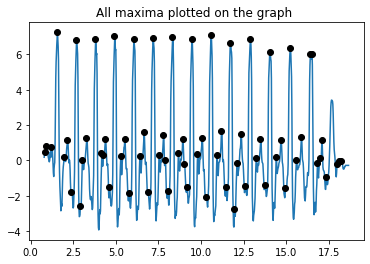

In [ ]:

index = 0 
Max = [] 
Max_index = [] 

while True:
    if index + 4 < len(AvgZ):
        
        left_left = AvgZ[index]
        left = AvgZ[index + 1]
        mid = AvgZ[index + 2]
        right = AvgZ[index + 3]
        right_right = AvgZ[index + 4]
        
        if (left_left < left) and (left < mid) and (right < mid) and (right_right < right):
            
            Max_index.append(Time[index + 1])
            Max.append(mid)

    if index >= len(AvgZ):
        break
    index += 1 


plt.plot(Time, AvgZ)
plt.title("Peak Points ")
plt.plot(Max_index, Max, 'o', color='red')
plt.show() 


As shown in the graph so many unwante peaks are detected so now we eill apply a smoothing filter on the graph to maintain to slope of the graph.

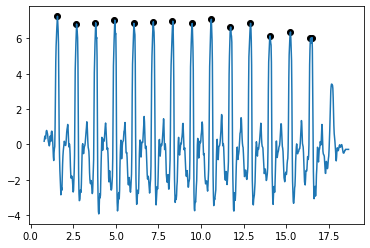

In [ ]:

Max_filtered = [] 
Max_filtered_time = [] 

index=0 
for i in Max: 
  if i >= 4: 
    Max_filtered.append(i)
    Max_filtered_time.append(Max_index[index])
  index += 1


plt.plot(Max_filtered_time, Max_filtered, 'o', color='black')
plt.plot(Time, AvgZ)

Total Number = Number of Max * 2

In [ ]:
no_of_steps = len(Max_filtered) * 2
print("Number of steps = ", no_of_steps)

Number of steps =  30


Here Actual number of steps was 32 so the algorithms is close to the actual value

Darsh Patel (19bic038@nirmauni.ac.in)
# Nirma University, Ahmedabad.